### tips data
1. 요일별 팁의 액수를 합산하여 막대그래프 시각화(1,6인 제외)
2. 요일별 파티 사이즈별 파티횟수 카운트, 막대그래프 시각화(size 2,3,4만)

In [11]:
import pandas as pd
import numpy as np

In [3]:
tips = pd.read_csv('C:/data/kallisma1/tips.csv')

In [34]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [12]:
np.unique(tips['day'])

array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)

In [78]:
# 다 같은 결과
# df[bool_Series]
# df.loc[bool_Series]
# 로 index에 맞는 row들을 얻을 수 있다.

tips1 = tips.loc[~tips['size'].isin([1,6])]
tips1 = tips.loc[~tips['size'].isin([1,6]),:]
tips1 = tips[~tips['size'].isin([1,6])]
tips2 = tips[(tips['size']!=1)&(tips['size']!=6)]
np.unique(tips1==tips2)

array([ True])

In [89]:
tips_by_day = tips1.groupby('day')['tip'].sum()
tips_by_day=tips_by_day[['Thur','Fri','Sat','Sun']]

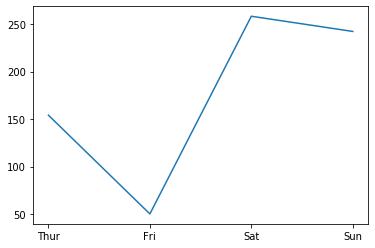

In [90]:
import matplotlib.pyplot as plt
plt.plot(tips_by_day)

-------
## 2.

In [97]:
party_count = pd.crosstab(tips1['day'],tips1['size'])

In [98]:
p_count = party_count.loc[['Thur','Fri','Sat','Sun']]
p_count

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


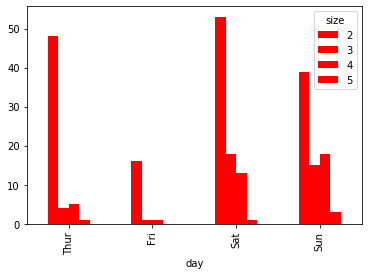

In [32]:
p_count.plot.bar(color='r')